In [ ]:
#Mengunduh dataset
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissor.zip

--2020-05-21 16:14:46--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissor.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  33.3MB/s    in 10s     

2020-05-21 16:14:56 (30.2 MB/s) - ‘/tmp/rockpaperscissor.zip’ saved [322873683/322873683]



In [ ]:
#Ekstrak dataset
import os, shutil, zipfile

file_zip = '/tmp/rockpaperscissor.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
#Membuat direktori Training, Validation dan Test input dataset
original_dataset_dir = '/tmp/rockpaperscissors'
original_dataset_paper_dir = '/tmp/rockpaperscissors/paper'
original_dataset_rock_dir = '/tmp/rockpaperscissors/rock'
original_dataset_scissors_dir = '/tmp/rockpaperscissors/scissors'

base_dir = '/tmp/submission'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_paper_dir = os.path.join(train_dir, 'paper')
os.mkdir(train_paper_dir)
train_rock_dir = os.path.join(train_dir, 'rock')
os.mkdir(train_rock_dir)
train_scissors_dir = os.path.join(train_dir, 'scissors')
os.mkdir(train_scissors_dir)

validation_paper_dir = os.path.join(validation_dir, 'paper')
os.mkdir(validation_paper_dir)
validation_rock_dir = os.path.join(validation_dir, 'rock')
os.mkdir(validation_rock_dir)
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
os.mkdir(validation_scissors_dir)

test_paper_dir = os.path.join(test_dir, 'paper')
os.mkdir(test_paper_dir)
test_rock_dir = os.path.join(test_dir, 'rock')
os.mkdir(test_rock_dir)
test_scissors_dir = os.path.join(test_dir, 'scissors')
os.mkdir(test_scissors_dir)

dir_path = [[original_dataset_paper_dir, 'paper{}.png'],
            [original_dataset_rock_dir, 'rock{}.png'],
            [original_dataset_scissors_dir, 'scissors{}.png']]
            
dir_input = [[train_paper_dir, validation_paper_dir, test_paper_dir, 712],
             [train_rock_dir, validation_rock_dir, test_rock_dir, 726],
             [train_scissors_dir, validation_scissors_dir, test_scissors_dir, 750]]

#Mengubah nama dataset
def rename_data(dir_path):
  i=0
  for fname in os.listdir(dir_path[0]):
    os.rename(os.path.join(dir_path[0], fname), os.path.join(dir_path[0], dir_path[1].format(i)))
    i+=1

for n in range(len(dir_path)):
  rename_data(dir_path[n])



In [ ]:
#Membagi dataset ke direktori training, validation dan test
def copy_data(dir_input, dir_path):

  #copy 500 data pertama ke direktori training
  fnames = [dir_path[1].format(i) for i in range(dir_input[3]-200)]
  for fname in fnames:
    src = os.path.join(dir_path[0], fname)
    dest = os.path.join(dir_input[0], fname)
    shutil.copyfile(src, dest)
  
  #copy 100 data ke direktori validation
  fnames = [dir_path[1].format(i) for i in range(dir_input[3]-200, dir_input[3]-100)]
  for fname in fnames:
    src = os.path.join(dir_path[0], fname)
    dest = os.path.join(dir_input[1], fname)
    shutil.copyfile(src, dest)
  
  #copy 100 data ke direktori test
  fnames = [dir_path[1].format(i) for i in range(dir_input[3]-100, dir_input[3])]
  for fname in fnames:
    src = os.path.join(dir_path[0], fname)
    dest = os.path.join(dir_input[2], fname)
    shutil.copyfile(src, dest)


for i in range(len(dir_input)):
  copy_data(dir_input[i], dir_path[i])

In [ ]:
#Membuat model jaringan konvolusi

#Mengimport modul yang diperlukan
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

#Membuat model jaringan
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

#Compile model dengan parameter yang sesuai
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_dir = "/tmp/submission/train"
val_dir = "/tmp/submission/validation"

#Menambah augmentasi gambar input
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(val_dir,
                                                       target_size=(150, 150),
                                                       batch_size=20,
                                                       class_mode='categorical')


#Membuat callback untuk menyimpan model dengan performa validation set terbaik ke file "model_jaringan_convolution.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("model_jaringan_convolution.h5", save_best_only=True)

#Membuat callback untuk menghentikan training apabila tidak ada peningkatan pada accuracy dan loss validation set dalam 10 epoch
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)

#Melatih model
history = model.fit(train_generator,
                    steps_per_epoch=30,
                    epochs=40,
                    validation_data=validation_generator,
                    validation_steps=5,
                    verbose=1,
                    callbacks=[checkpoint_callback, early_stopping_callback])

model = tf.keras.models.load_model("model_jaringan_convolution.h5")


Found 1588 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Epoch 1/40
30/30 [==============================] - 31s 1s/step - loss: 1.0992 - acc: 0.3367 - val_loss: 1.0874 - val_acc: 0.3600
Epoch 2/40
30/30 [==============================] - 31s 1s/step - loss: 1.0787 - acc: 0.3912 - val_loss: 1.0235 - val_acc: 0.5200
Epoch 3/40
30/30 [==============================] - 31s 1s/step - loss: 1.0444 - acc: 0.4417 - val_loss: 1.0093 - val_acc: 0.4900
Epoch 4/40
30/30 [==============================] - 31s 1s/step - loss: 1.0216 - acc: 0.4750 - val_loss: 1.0706 - val_acc: 0.4500
Epoch 5/40
30/30 [==============================] - 31s 1s/step - loss: 1.0015 - acc: 0.5204 - val_loss: 0.9074 - val_acc: 0.6300
Epoch 6/40
30/30 [==============================] - 31s 1s/step - loss: 0.9521 - acc: 0.5800 - val_loss: 1.1322 - val_acc: 0.4900
Epoch 7/40
30/30 [==============================] - 31s 1s/step - loss: 0.9350 - acc: 0.5578 - val_loss: 0.8501 - val_acc: 0.6700
Epoch 8

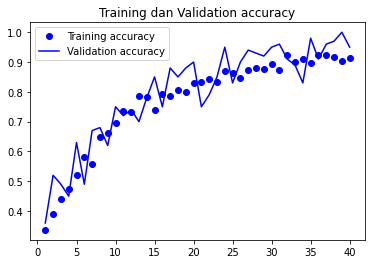

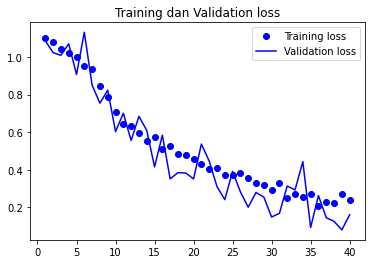

In [ ]:
#Membuat plot visual loss dan accuracy training dan validation
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training dan Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training dan Validation loss')
plt.legend()

plt.show()

Saving scissors661.png to scissors661.png
Scissor


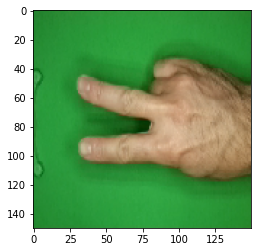

In [ ]:
#Memprediksi gambar
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
%matplotlib inline

uploaded = files.upload()

for fname in uploaded.keys():
  img = image.load_img(fname, target_size=(150, 150))
  imgplot = plt.imshow(img)
  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])
  classes = model.predict(images, batch_size=10)  
  
  if np.argmax(classes[0]) == 0:
    print("Paper")
  elif np.argmax(classes[0]) == 1:
    print("Rock")
  elif np.argmax(classes[0]) == 2:
    print("Scissor")